Training and evaluating support vector machines to identify the similarity in appeareance between a variety species of flowers using Gridsearch to tune the parameters to SVM

Using an in-built seaborn dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
iris = sns.load_dataset('iris')

Understanding the information about the features of the data.

In [2]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Data Visualization

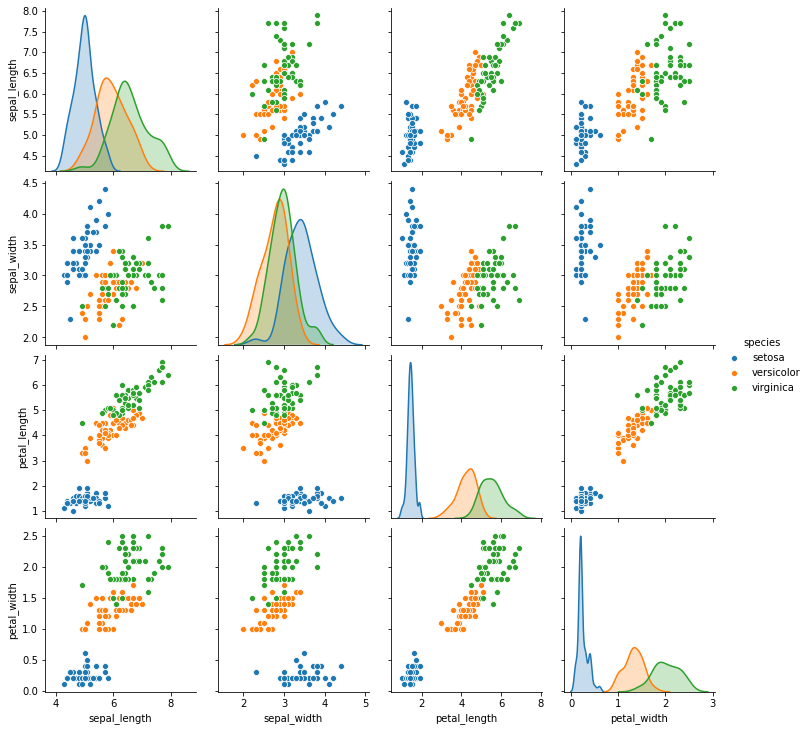

In [5]:
sns.pairplot(data = iris, hue = 'species')

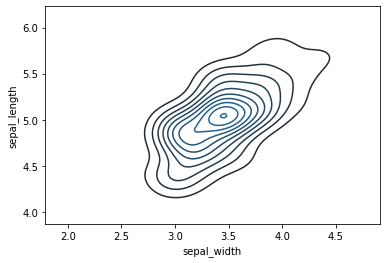

In [6]:
sns.kdeplot(iris[iris["species"]=="setosa"]['sepal_width'], iris[iris["species"]=="setosa"]['sepal_length'])

Partitioning the data and training the SVM with default parameters

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop('species', axis = 1), iris['species'], test_size = 0.3)

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC()

In [11]:
svc.fit(x_train, y_train)

SVC()

Predicting all possible species and evaluating the trained model

In [12]:
pred = svc.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



The model almost perfectly with an accuracy of ~98%. Using GridSearch in order to tune the "C" and "gamma" parameters  achieve better results.

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1, 0.01, 0.001, 0.00001]}

In [17]:
gs = GridSearchCV(SVC(), param_grid, verbose = 3)

In [18]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.952, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.952, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.905, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.667, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.667, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.714, total=   0.0s
[CV] 

[CV] .................. C=1000, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.905, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.952, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.952, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.952, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.905, total=   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05]},
             verbose=3)

In [19]:
pred = gs.predict(x_test)

In [20]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17  0  0]
 [ 0 17  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.89      1.00      0.94        17
   virginica       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



Tuning the 'C' and 'gamma' parameters actually DECREASED the performance in this case, however, still maintain high averages. The model is achieves over 95% accuracy and the 5% of error has a lot of noise (making it's marginal value negotiable).